In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("C:/Users/DELL/Desktop/risk_factors_cervical_cancer.csv")

In [ ]:
df = df.replace('?', np.nan)

In [ ]:
df = df.apply(pd.to_numeric)

In [ ]:
df = df.fillna(df.mean())

In [ ]:
y = df['Biopsy']
X = df.drop(columns = ['Biopsy'])

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [ ]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [ ]:
np.set_printoptions(precision=3)
print(fit.scores_)

[7.225e+00 1.866e-03 2.073e-02 1.393e+00 6.110e-01 4.374e+01 5.614e+00
 1.600e-02 2.935e+01 1.749e+00 5.645e+00 7.679e+00 1.245e+01 5.065e+00
       nan 2.899e-01 5.371e+00 1.304e+00 7.247e-02 1.264e+01 7.247e-02
       nan 1.133e+01 7.247e-02 1.449e-01 8.522e+00 3.521e-01 1.630e-01
 2.175e+01 1.087e+01 2.175e+01 2.072e+01 2.466e+02 4.215e+02 8.729e+01]


In [ ]:
features = fit.transform(X)

In [ ]:
print(features[0:5,:])

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [37.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

In [ ]:
#age, smokes, STDs, pelvic inflammatorydisease, AIDs, Hepatitis B, STD no. of diagnosis

In [ ]:
test_cols = ["Hinselmann", "Schiller", "Citology", "Biopsy"]
df["total_tests"] = df[test_cols].sum(axis = 1)

In [ ]:
df=df.drop(['Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes (years)','Smokes (packs/year)','Hormonal Contraceptives','Hormonal Contraceptives (years)'],axis=1)

In [ ]:
df=df.drop(['IUD','IUD (years)','STDs (number)','STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:genital herpes','STDs:molluscum contagiosum'],axis=1)

In [ ]:
df=df.drop(['STDs:HIV','STDs:HPV','STDs: Time since first diagnosis','STDs: Time since last diagnosis','Dx:CIN','Dx:HPV','Dx','Hinselmann','Schiller','Citology','Biopsy'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               1682 non-null   int64  
 1   Smokes                            1682 non-null   float64
 2   STDs                              1682 non-null   float64
 3   STDs:pelvic inflammatory disease  1682 non-null   float64
 4   STDs:AIDS                         1682 non-null   float64
 5   STDs:Hepatitis B                  1682 non-null   float64
 6   STDs: Number of diagnosis         1682 non-null   int64  
 7   total_tests                       1682 non-null   int64  
 8   Dx:Cancer                         1682 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 118.4 KB


# AdaBoost

In [ ]:
y1 = df['Dx:Cancer']
X1 = df.drop(columns = ['Dx:Cancer'])

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN

In [ ]:
#adasyn = ADASYN(random_state=42)
#x_adasyn,y_adasyn = adasyn.fit_resample(X1,y1)
#df = x_adasyn.join(y_adasyn)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3)

In [ ]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

In [ ]:
model1 = abc.fit(X_train1, y_train1)

In [ ]:
y_pred1 = model1.predict(X_test1)

In [ ]:
from sklearn import metrics

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test1,y_pred1))
print("precision:",metrics.precision_score(y_test1,y_pred1))
print("Recall:",metrics.recall_score(y_test1,y_pred1))
print(metrics.accuracy_score(y_test1,y_pred1)*100,"%:","chances that person having cervical cancer in the present dataset")
print(y_pred1)

Accuracy: 0.8514851485148515
precision: 0.8208955223880597
Recall: 0.8906882591093117
85.14851485148515 %: chances that person having cervical cancer in the present dataset
[0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1
 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0
 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0
 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0
 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1
 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1
 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1
 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1
 0

In [ ]:
cnf_matrix_evaluation=metrics.confusion_matrix(y_test1,y_pred1)
cnf_matrix_evaluation

array([[210,  48],
       [ 27, 220]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

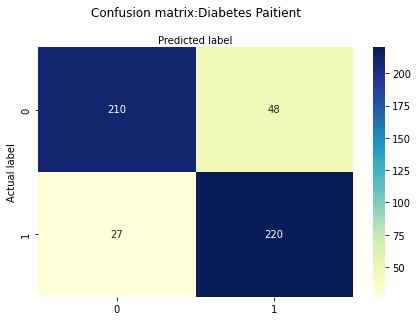

In [ ]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_evaluation),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix:Diabetes Paitient",y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [ ]:
y2 = df['Dx:Cancer']
X2 = df.drop(columns = ['Dx:Cancer'])

In [ ]:
#adasyn = ADASYN(random_state=42)
#x_adasyn,y_adasyn = adasyn.fit_resample(X2,y2)
#df = x_adasyn.join(y_adasyn)

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2)

In [ ]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

In [ ]:
model2 = abc.fit(X_train2, y_train2)

In [ ]:
y_pred2 = model2.predict(X_test2)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test2,y_pred2))
print("precision:",metrics.precision_score(y_test2,y_pred2))
print("Recall:",metrics.recall_score(y_test2,y_pred2))
print(metrics.accuracy_score(y_test2,y_pred2)*100,"%:","chances that person having cervical cancer in the present dataset")
print(y_pred2)

Accuracy: 0.8753709198813057
precision: 0.8789473684210526
Recall: 0.8978494623655914
87.53709198813057 %: chances that person having cervical cancer in the present dataset
[1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1
 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0
 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1
 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0
 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1
 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0
 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0
 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1
 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1
 1 1 1 0]


In [ ]:
cnf_matrix_evaluation=metrics.confusion_matrix(y_test2,y_pred2)
cnf_matrix_evaluation

array([[128,  23],
       [ 19, 167]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

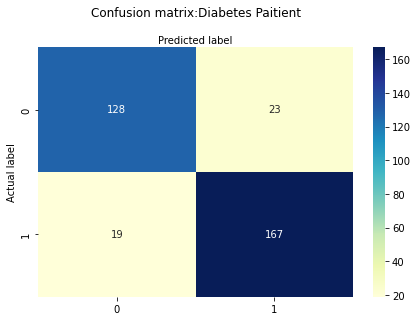

In [ ]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_evaluation),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix:Diabetes Paitient",y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [ ]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test1, abc.predict_proba(X_test1)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test2, abc.predict_proba(X_test2)[:, 1], pos_label = 1)

In [ ]:
auc1=metrics.roc_auc_score(y_test1,y_pred1)
auc2=metrics.roc_auc_score(y_test2,y_pred2)

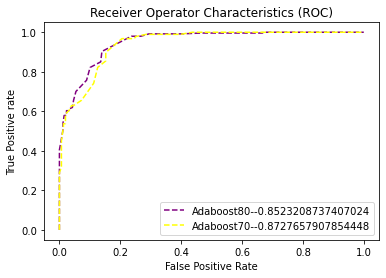

In [ ]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "purple", label = "Adaboost80--"+str(auc1))
plt.plot(fpr2, tpr2, linestyle = "--", color = "yellow", label = "Adaboost70--"+str(auc2))
plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

Text(0.5, 1.0, 'Comparison')

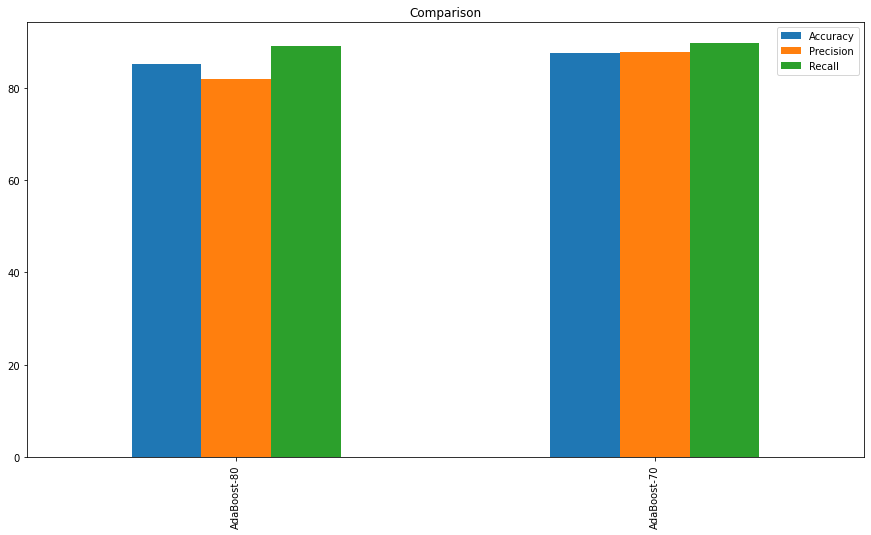

In [ ]:
plotdata = pd.DataFrame({

    "Accuracy":[85.1,87.5],

    "Precision":[82,87.8],

    "Recall":[89,89.7]},

    index=["AdaBoost-80", "AdaBoost-70"])

plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("Comparison")



# KNN

In [ ]:
y3 = df['Dx:Cancer']
X3 = df.drop(columns = ['Dx:Cancer'])

In [ ]:
#adasyn = ADASYN(random_state=42)
#x_adasyn,y_adasyn = adasyn.fit_resample(X3,y3)
#df = x_adasyn.join(y_adasyn)

In [ ]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier()
model_knn.fit(X_train3,y_train3)

KNeighborsClassifier()

In [ ]:
y_pred3=model_knn.predict(X_test3)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test3,y_pred3))
print("precision:",metrics.precision_score(y_test3,y_pred3))
print("Recall:",metrics.recall_score(y_test3,y_pred3))
print(metrics.accuracy_score(y_test3,y_pred3)*100,"%:","chances that person having cervical cancer in the present dataset")
print(y_pred3)

Accuracy: 0.8574257425742574
precision: 0.8028169014084507
Recall: 0.9344262295081968
85.74257425742574 %: chances that person having cervical cancer in the present dataset
[0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0
 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1
 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1
 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1
 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1
 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0
 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1
 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0
 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1
 1

In [ ]:
cnf_matrix_evaluation=metrics.confusion_matrix(y_test3,y_pred3)
cnf_matrix_evaluation

array([[205,  56],
       [ 16, 228]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

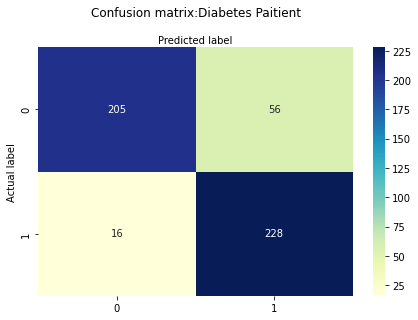

In [ ]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_evaluation),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix:Diabetes Paitient",y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [ ]:
y4 = df['Dx:Cancer']
X4= df.drop(columns = ['Dx:Cancer'])

In [ ]:
#adasyn = ADASYN(random_state=42)
#x_adasyn,y_adasyn = adasyn.fit_resample(X4,y4)
#df = x_adasyn.join(y_adasyn)

In [ ]:
X_train4, X_test4, y_train4, y_test4= train_test_split(X4, y4, test_size = 0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier()
model_knn.fit(X_train4,y_train4)

KNeighborsClassifier()

In [ ]:
y_pred4=model_knn.predict(X_test4)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test4,y_pred4))
print("precision:",metrics.precision_score(y_test4,y_pred4))
print("Recall:",metrics.recall_score(y_test4,y_pred4))
print(metrics.accuracy_score(y_test4,y_pred4)*100,"%:","chances that person having cervical cancer in the present dataset")
print(y_pred4)

Accuracy: 0.8160237388724035
precision: 0.807909604519774
Recall: 0.8362573099415205
81.60237388724035 %: chances that person having cervical cancer in the present dataset
[1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0
 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0
 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1
 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0
 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1
 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0
 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1
 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1
 1 0 1 0]


In [ ]:
cnf_matrix_evaluation=metrics.confusion_matrix(y_test4,y_pred4)
cnf_matrix_evaluation

array([[132,  34],
       [ 28, 143]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

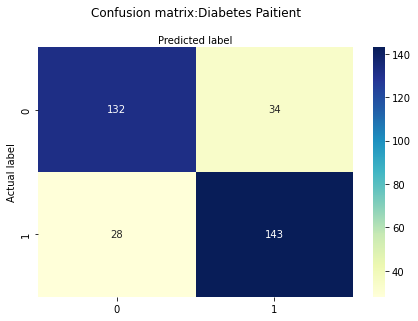

In [ ]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_evaluation),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix:Diabetes Paitient",y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [ ]:

fpr1, tpr1, thresh1 = roc_curve(y_test3, model_knn.predict_proba(X_test3)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test4, model_knn.predict_proba(X_test4)[:, 1], pos_label = 1)

In [ ]:
auc1=metrics.roc_auc_score(y_test3,y_pred3)
auc2=metrics.roc_auc_score(y_test4,y_pred4)

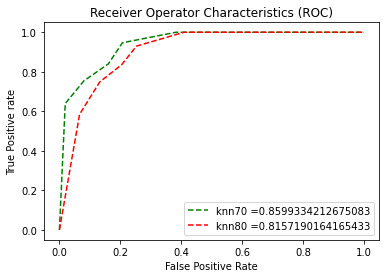

In [ ]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "green", label = "knn70 ="+str(auc1))
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "knn80 ="+str(auc2))

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

Text(0.5, 1.0, 'Comparison')

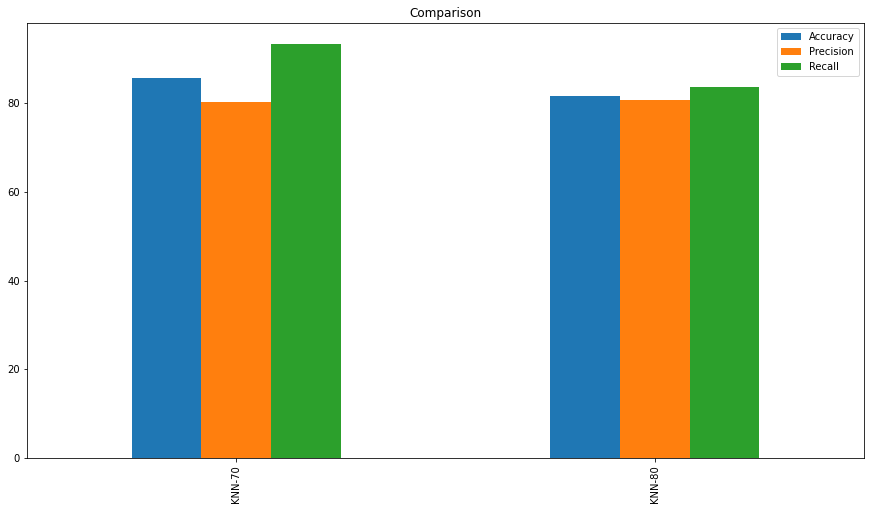

In [ ]:
plotdata = pd.DataFrame({

    "Accuracy":[85.7,81.6],

    "Precision":[80.2,80.7],

    "Recall":[93.4,83.6]},

    index=["KNN-70", "KNN-80"])

plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("Comparison")

# Naive Bayes

In [ ]:
y5 = df['Dx:Cancer']
X5= df.drop(columns = ['Dx:Cancer'])

In [ ]:
#adasyn = ADASYN(random_state=42)
#x_adasyn,y_adasyn = adasyn.fit_resample(X5,y5)
#df = x_adasyn.join(y_adasyn)

In [ ]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size = 0.3)

In [ ]:
from sklearn.naive_bayes import GaussianNB

model_gnb=GaussianNB()
model_gnb.fit(X_train5, y_train5)

GaussianNB()

In [ ]:
y_pred5=model_gnb.predict(X_test5)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test5,y_pred5))
print("precision:",metrics.precision_score(y_test5,y_pred5))
print("Recall:",metrics.recall_score(y_test5,y_pred5))
print(metrics.accuracy_score(y_test5,y_pred5)*100,"%:","chances that person having cervical cancer in the present dataset")
print(y_pred5)

Accuracy: 0.596039603960396
precision: 0.546875
Recall: 0.9959349593495935
59.603960396039604 %: chances that person having cervical cancer in the present dataset
[1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 0 1 1 1

In [ ]:
cnf_matrix_evaluation=metrics.confusion_matrix(y_test5,y_pred5)
cnf_matrix_evaluation

array([[ 56, 203],
       [  1, 245]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

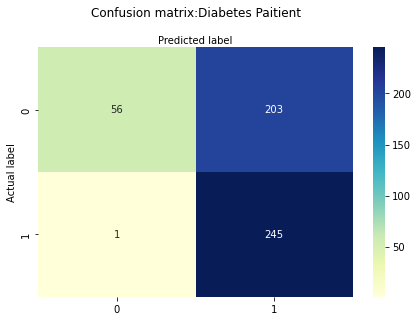

In [ ]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_evaluation),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix:Diabetes Paitient",y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [ ]:
y6 = df['Dx:Cancer']
X6= df.drop(columns = ['Dx:Cancer'])

In [ ]:
#adasyn = ADASYN(random_state=42)
#x_adasyn,y_adasyn = adasyn.fit_resample(X6,y6)
#df = x_adasyn.join(y_adasyn)

In [ ]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size = 0.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB

model_gnb=GaussianNB()
model_gnb.fit(X_train6, y_train6)

GaussianNB()

In [ ]:
y_pred6=model_gnb.predict(X_test6)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test6,y_pred6))
print("precision:",metrics.precision_score(y_test6,y_pred6))
print("Recall:",metrics.recall_score(y_test6,y_pred6))
print(metrics.accuracy_score(y_test6,y_pred6)*100,"%:","chances that person having cervical cancer in the present dataset")
print(y_pred6)

Accuracy: 0.5637982195845698
precision: 0.5164473684210527
Recall: 1.0
56.37982195845698 %: chances that person having cervical cancer in the present dataset
[1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 0 1]


In [ ]:
cnf_matrix_evaluation=metrics.confusion_matrix(y_test6,y_pred6)
cnf_matrix_evaluation

array([[ 33, 147],
       [  0, 157]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

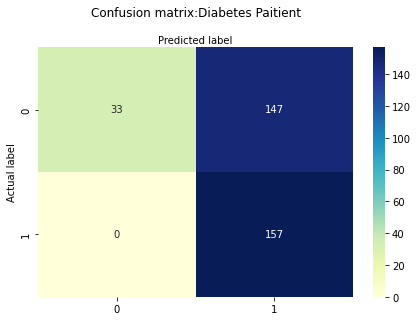

In [ ]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_evaluation),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix:Diabetes Paitient",y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [ ]:

fpr5, tpr5, thresh5 = roc_curve(y_test5, model_knn.predict_proba(X_test5)[:, 1], pos_label = 1)
fpr6, tpr6, thresh6 = roc_curve(y_test6, model_knn.predict_proba(X_test6)[:, 1], pos_label = 1)

In [ ]:
auc5=metrics.roc_auc_score(y_test5,y_pred5)
auc6=metrics.roc_auc_score(y_test6,y_pred6)

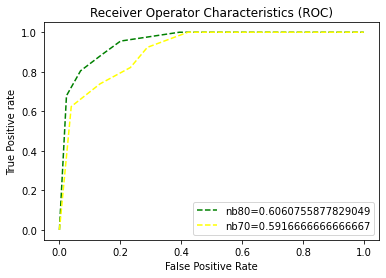

In [ ]:
plt.plot(fpr5, tpr5, linestyle = "--", color = "green", label = "nb80="+str(auc5))
plt.plot(fpr6, tpr6, linestyle = "--", color = "yellow", label = "nb70="+str(auc6))
plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

Text(0.5, 1.0, 'Comparison')

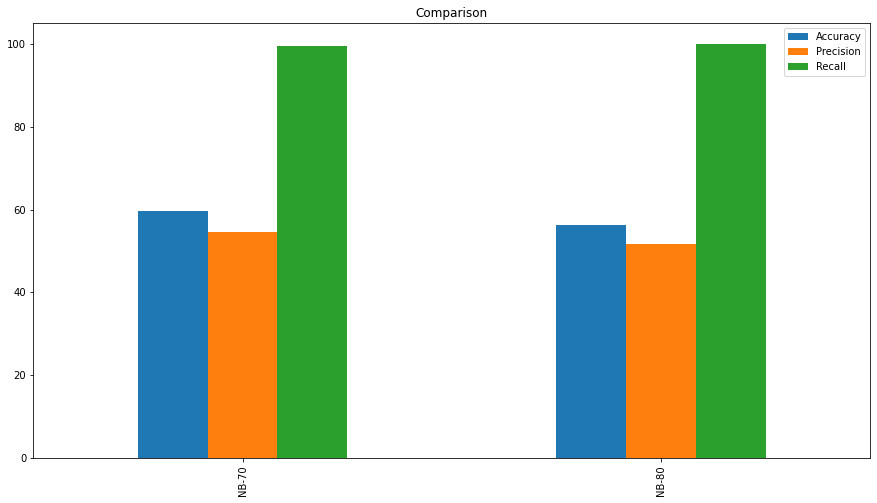

In [ ]:
plotdata = pd.DataFrame({

    "Accuracy":[59.6,56.3],

    "Precision":[54.6,51.6],

    "Recall":[99.5,100]},

    index=["NB-70", "NB-80"])

plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("Comparison")

# SVM

In [ ]:
y7 = df['Dx:Cancer']
X7= df.drop(columns = ['Dx:Cancer'])

In [ ]:
X_train7,X_test7,y_train7,y_test7= train_test_split(X7,y7,test_size=0.2)

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
model_svm=LinearSVC(max_iter=10000)
model_svm=CalibratedClassifierCV(model_svm)
model_svm.fit(X_train7,y_train7)

CalibratedClassifierCV(base_estimator=LinearSVC(max_iter=10000))

In [ ]:
y_pred7=model_svm.predict(X_test7)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test7,y_pred7))
print("precision:",metrics.precision_score(y_test7,y_pred7))
print("Recall:",metrics.recall_score(y_test7,y_pred7))
print(metrics.accuracy_score(y_test7,y_pred7)*100,"%:","chances that person having cervical cancer in the present dataset")
print(y_pred7)

Accuracy: 0.7685459940652819
precision: 0.7655172413793103
Recall: 0.7161290322580646
76.8545994065282 %: chances that person having cervical cancer in the present dataset
[0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1
 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0
 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1
 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1
 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1
 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0
 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0
 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1
 1 0 1 0]


In [ ]:
cnf_matrix_evaluation=metrics.confusion_matrix(y_test7,y_pred7)
cnf_matrix_evaluation

array([[148,  34],
       [ 44, 111]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

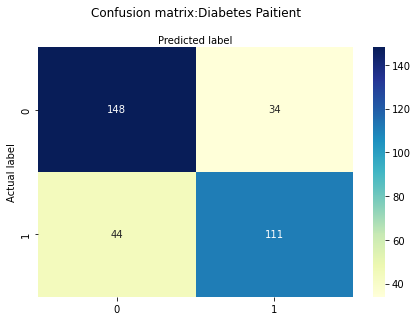

In [ ]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_evaluation),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix:Diabetes Paitient",y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [ ]:
y8 = df['Dx:Cancer']
X8= df.drop(columns = ['Dx:Cancer'])

In [ ]:
X_train8,X_test8,y_train8,y_test8= train_test_split(X8,y8,test_size=0.3)

In [ ]:
 model_svm=LinearSVC(max_iter=10000)
model_svm=CalibratedClassifierCV(model_svm)
model_svm.fit(X_train8,y_train8)

CalibratedClassifierCV(base_estimator=LinearSVC(max_iter=10000))

In [ ]:
y_pred8=model_svm.predict(X_test8)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test8,y_pred8))
print("precision:",metrics.precision_score(y_test8,y_pred8))
print("Recall:",metrics.recall_score(y_test8,y_pred8))
print(metrics.accuracy_score(y_test8,y_pred8)*100,"%:","chances that person having cervical cancer in the present dataset")
print(y_pred8)

Accuracy: 0.7663366336633664
precision: 0.8081632653061225
Recall: 0.7360594795539034
76.63366336633663 %: chances that person having cervical cancer in the present dataset
[1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0
 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1
 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0
 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0
 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0
 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1
 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1
 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1
 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0
 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0
 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0
 0

In [ ]:
cnf_matrix_evaluation=metrics.confusion_matrix(y_test8,y_pred8)
cnf_matrix_evaluation

array([[189,  47],
       [ 71, 198]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

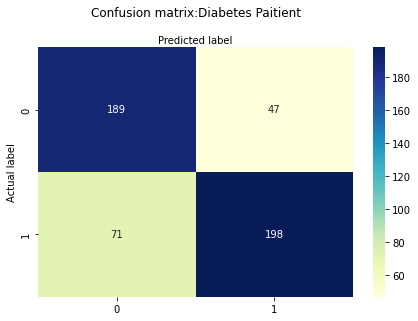

In [ ]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_evaluation),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix:Diabetes Paitient",y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [ ]:

fpr7, tpr7, thresh7 = roc_curve(y_test7, model_svm.predict_proba(X_test7)[:, 1], pos_label = 1)
fpr8, tpr8, thresh8 = roc_curve(y_test8, model_svm.predict_proba(X_test8)[:, 1], pos_label = 1)

In [ ]:
auc7=metrics.roc_auc_score(y_test7,y_pred7)
auc8=metrics.roc_auc_score(y_test8,y_pred8)

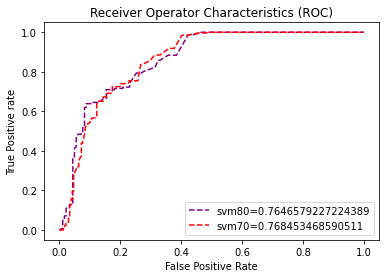

In [ ]:
plt.plot(fpr7, tpr7, linestyle = "--", color = "purple", label = "svm80="+str(auc7))
plt.plot(fpr8, tpr8, linestyle = "--", color = "red", label = "svm70="+str(auc8))
plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

Text(0.5, 1.0, 'Comparison')

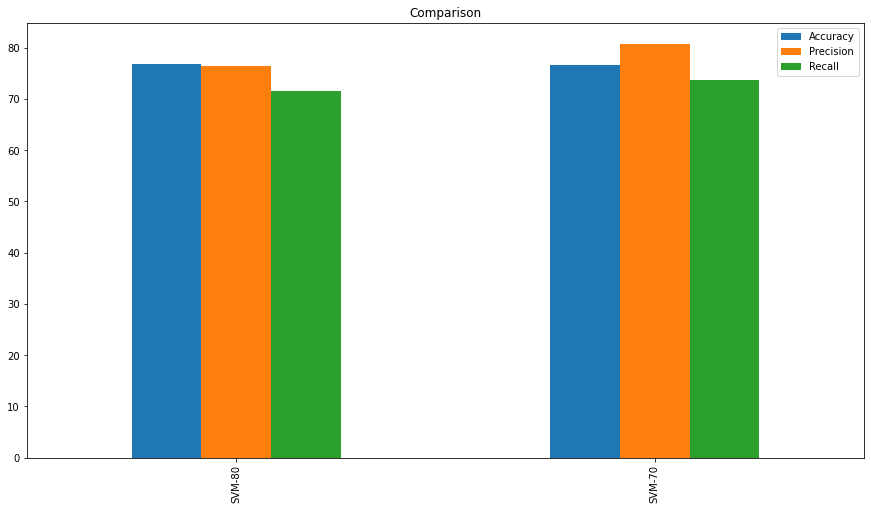

In [ ]:
plotdata = pd.DataFrame({

    "Accuracy":[76.8,76.6],

    "Precision":[76.5,80.8],

    "Recall":[71.6,73.6]},

    index=["SVM-80", "SVM-70"])

plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("Comparison")

# XG Boost

In [ ]:
y9 = df['Dx:Cancer']
X9= df.drop(columns = ['Dx:Cancer'])

In [ ]:
X_train9,X_test9,y_train9,y_test9= train_test_split(X9,y9,test_size=0.3)

In [ ]:
import xgboost as xgb

In [ ]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train9,y_train9)
y_pred9 = xgb_classifier.predict(X_test9)

[15:08:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test9,y_pred9))
print("precision:",metrics.precision_score(y_test9,y_pred9))
print("Recall:",metrics.recall_score(y_test9,y_pred9))
print(metrics.accuracy_score(y_test9,y_pred9)*100,"%:","chances that person having cervical cancer in the present dataset")
print(y_pred9)

Accuracy: 0.8831683168316832
precision: 0.8607142857142858
Recall: 0.9233716475095786
88.31683168316832 %: chances that person having cervical cancer in the present dataset
[0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1
 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0
 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0
 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0
 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1
 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0
 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1
 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0
 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1
 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0
 0

In [ ]:
cnf_matrix_evaluation=metrics.confusion_matrix(y_test9,y_pred9)
cnf_matrix_evaluation

array([[205,  39],
       [ 20, 241]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

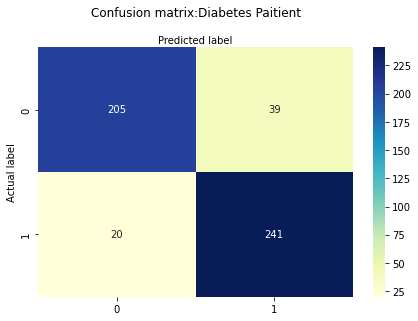

In [ ]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_evaluation),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix:Diabetes Paitient",y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [ ]:
y10 = df['Dx:Cancer']
X10= df.drop(columns = ['Dx:Cancer'])

In [ ]:
X_train10,X_test10,y_train10,y_test10= train_test_split(X10,y10,test_size=0.2)

In [ ]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train10,y_train10)
y_pred10 = xgb_classifier.predict(X_test10)

[15:09:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test10,y_pred10))
print("precision:",metrics.precision_score(y_test10,y_pred10))
print("Recall:",metrics.recall_score(y_test10,y_pred10))
print(metrics.accuracy_score(y_test10,y_pred10)*100,"%:","chances that person having cervical cancer in the present dataset")
print(y_pred10)

Accuracy: 0.9109792284866469
precision: 0.930635838150289
Recall: 0.8994413407821229
91.0979228486647 %: chances that person having cervical cancer in the present dataset
[0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0
 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0
 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0
 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0
 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1
 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0
 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0
 1 1 1 1]


In [ ]:
cnf_matrix_evaluation=metrics.confusion_matrix(y_test10,y_pred10)
cnf_matrix_evaluation

array([[146,  12],
       [ 18, 161]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

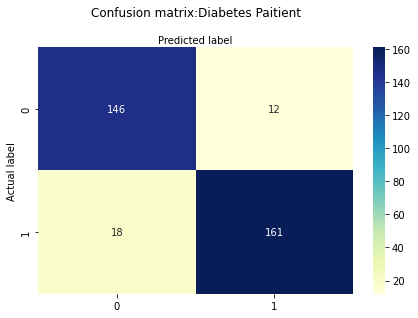

In [ ]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_evaluation),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix:Diabetes Paitient",y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [ ]:

fpr9, tpr9, thresh9 = roc_curve(y_test9, xgb_classifier.predict_proba(X_test9)[:, 1], pos_label = 1)
fpr10, tpr10, thresh10 = roc_curve(y_test10, xgb_classifier.predict_proba(X_test10)[:, 1], pos_label = 1)

In [ ]:
auc9=metrics.roc_auc_score(y_test9,y_pred9)
auc10=metrics.roc_auc_score(y_test10,y_pred10)

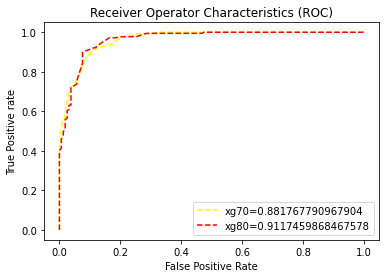

In [ ]:
plt.plot(fpr9, tpr9, linestyle = "--", color = "yellow", label = "xg70="+str(auc9))
plt.plot(fpr10, tpr10, linestyle = "--", color = "red", label = "xg80="+str(auc10))
plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

Text(0.5, 1.0, 'Comparison')

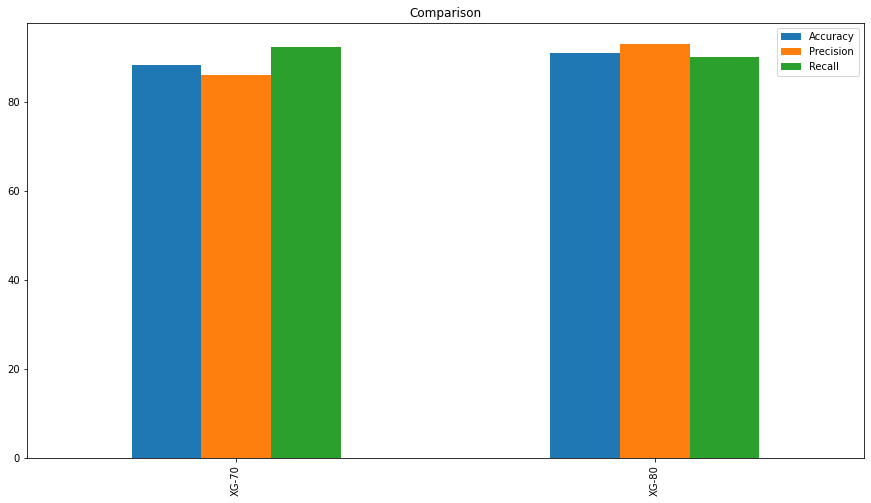

In [ ]:
plotdata = pd.DataFrame({

    "Accuracy":[88.3,91],

    "Precision":[86,93],

    "Recall":[92.3,89.9]},

    index=["XG-70", "XG-80"])

plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("Comparison")

# Decision Tree

In [ ]:
y11 = df['Dx:Cancer']
X11= df.drop(columns = ['Dx:Cancer'])

In [ ]:
X_train11,X_test11,y_train11,y_test11= train_test_split(X11,y11,test_size=0.3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)


In [ ]:
clf_gini.fit(X_train11, y_train11)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [ ]:
y_pred11 = clf_gini.predict(X_test11)

In [ ]:
from sklearn import tree

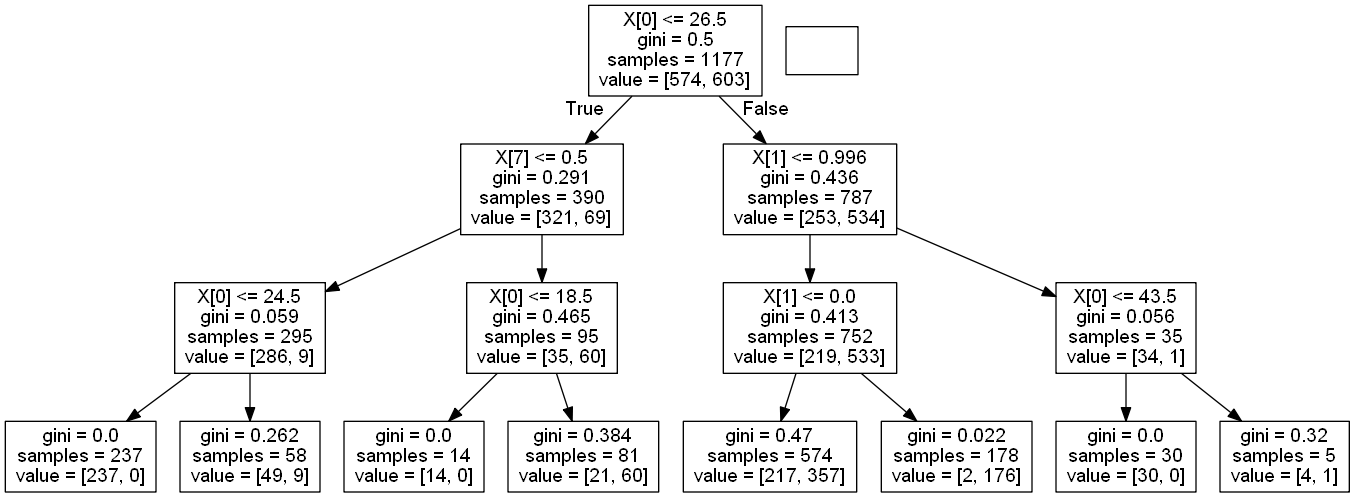

In [ ]:
dot_data=tree.export_graphviz(clf_gini,out_file=None)
from IPython.display import Image
import pydotplus
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test11,y_pred11))
print("precision:",metrics.precision_score(y_test11,y_pred11))
print("Recall:",metrics.recall_score(y_test11,y_pred11))
print(metrics.accuracy_score(y_test11,y_pred11)*100,"%:","chances that person having cervical cancer in the present dataset")
print(y_pred11)

Accuracy: 0.7801980198019802
precision: 0.6871345029239766
Recall: 0.9832635983263598
78.01980198019803 %: chances that person having cervical cancer in the present dataset
[0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0
 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1
 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1
 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1
 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1
 0

In [ ]:
cnf_matrix_evaluation=metrics.confusion_matrix(y_test11,y_pred11)
cnf_matrix_evaluation

array([[159, 107],
       [  4, 235]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

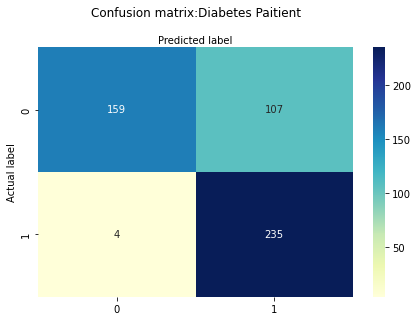

In [ ]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_evaluation),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix:Diabetes Paitient",y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [ ]:
y12 = df['Dx:Cancer']
X12= df.drop(columns = ['Dx:Cancer'])

In [ ]:
X_train12,X_test12,y_train12,y_test12= train_test_split(X12,y12,test_size=0.2)

In [ ]:
clf_gini.fit(X_train12, y_train12)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [ ]:
y_pred12 = clf_gini.predict(X_test12)

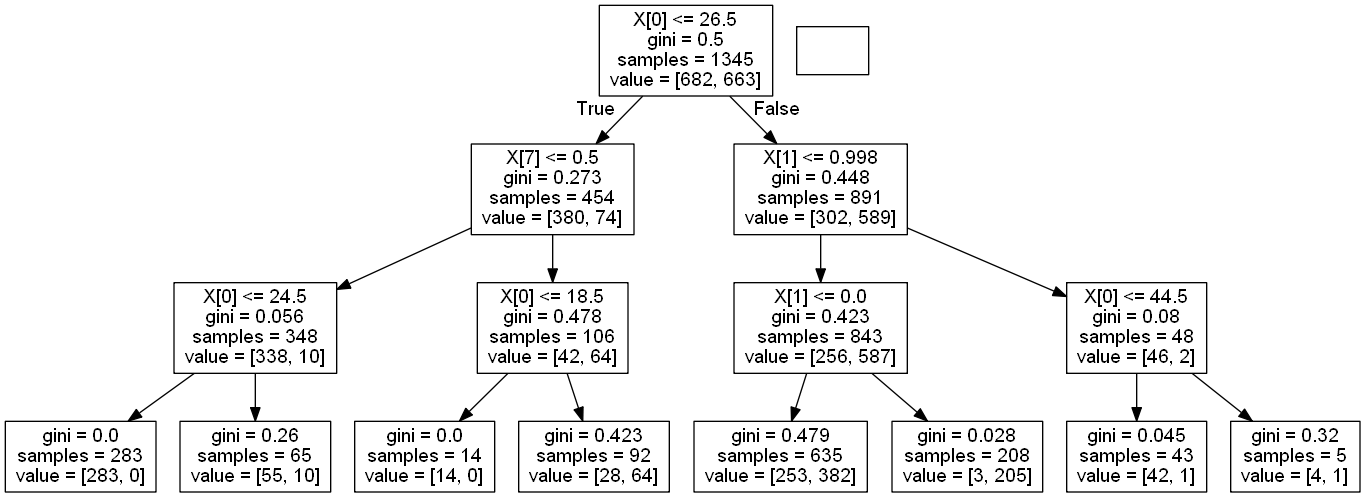

In [ ]:
dot_data=tree.export_graphviz(clf_gini,out_file=None)
from IPython.display import Image
import pydotplus
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test12,y_pred12))
print("precision:",metrics.precision_score(y_test12,y_pred12))
print("Recall:",metrics.recall_score(y_test12,y_pred12))
print(metrics.accuracy_score(y_test12,y_pred12)*100,"%:","chances that person having cervical cancer in the present dataset")
print(y_pred12)

Accuracy: 0.8071216617210683
precision: 0.7375
Recall: 0.9888268156424581
80.71216617210682 %: chances that person having cervical cancer in the present dataset
[1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1
 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0
 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1
 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0
 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 1 1 1 1]


In [ ]:
cnf_matrix_evaluation=metrics.confusion_matrix(y_test12,y_pred12)
cnf_matrix_evaluation

array([[ 95,  63],
       [  2, 177]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

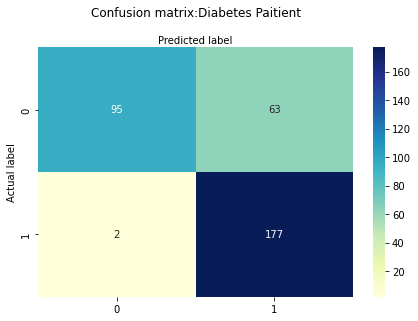

In [ ]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_evaluation),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix:Diabetes Paitient",y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [ ]:

fpr11, tpr11, thresh11 = roc_curve(y_test11, clf_gini.predict_proba(X_test11)[:, 1], pos_label = 1)
fpr12, tpr12, thresh12 = roc_curve(y_test12, clf_gini.predict_proba(X_test12)[:, 1], pos_label = 1)

In [ ]:
auc11=metrics.roc_auc_score(y_test11,y_pred11)
auc12=metrics.roc_auc_score(y_test12,y_pred12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               1682 non-null   int64  
 1   Smokes                            1682 non-null   float64
 2   STDs                              1682 non-null   float64
 3   STDs:pelvic inflammatory disease  1682 non-null   float64
 4   STDs:AIDS                         1682 non-null   float64
 5   STDs:Hepatitis B                  1682 non-null   float64
 6   STDs: Number of diagnosis         1682 non-null   int64  
 7   total_tests                       1682 non-null   int64  
 8   Dx:Cancer                         1682 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 118.4 KB


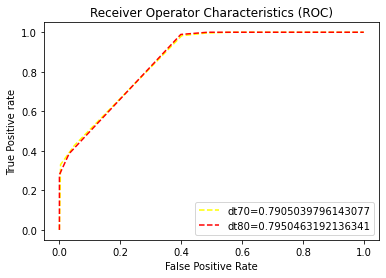

In [ ]:
plt.plot(fpr11, tpr11, linestyle = "--", color = "yellow", label = "dt70="+str(auc11))
plt.plot(fpr12, tpr12, linestyle = "--", color = "red", label = "dt80="+str(auc12))
plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

Text(0.5, 1.0, 'Comparison')

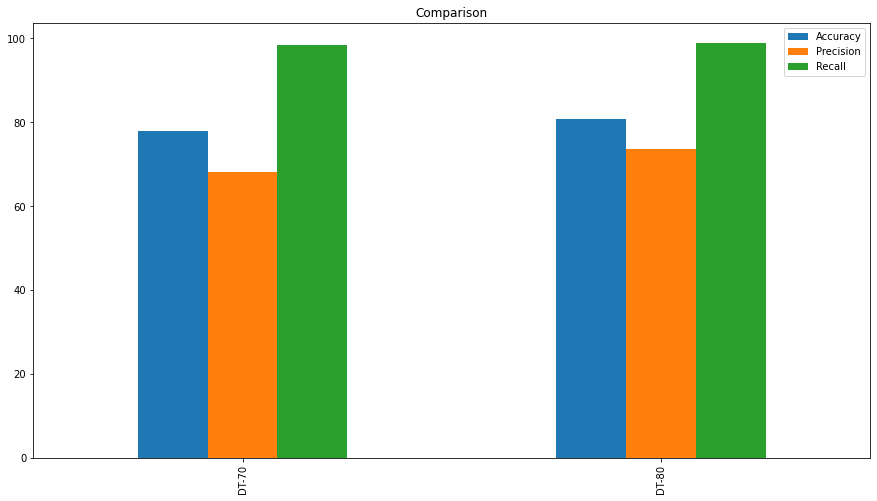

In [ ]:
plotdata = pd.DataFrame({

    "Accuracy":[78,80.7],

    "Precision":[68,73.7],

    "Recall":[98.3,98.8]},

    index=["DT-70", "DT-80"])

plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("Comparison")

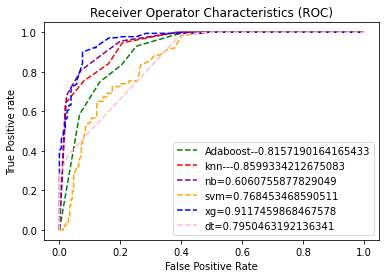

In [ ]:
plt.plot(fpr2, tpr2, linestyle = "--", color = "green", label = "Adaboost--"+str(auc2))
plt.plot(fpr1, tpr1, linestyle = "--", color = "red", label = "knn---"+str(auc1))
plt.plot(fpr5, tpr5, linestyle = "--", color = "purple", label = "nb="+str(auc5))
plt.plot(fpr8, tpr8, linestyle = "--", color = "orange", label = "svm="+str(auc8))
plt.plot(fpr10, tpr10, linestyle = "--", color = "blue", label = "xg="+str(auc10))
plt.plot(fpr12, tpr12, linestyle = "--", color = "pink", label = "dt="+str(auc12))

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 1000)
plt.show()

Text(0.5, 1.0, 'Comparison between all models')

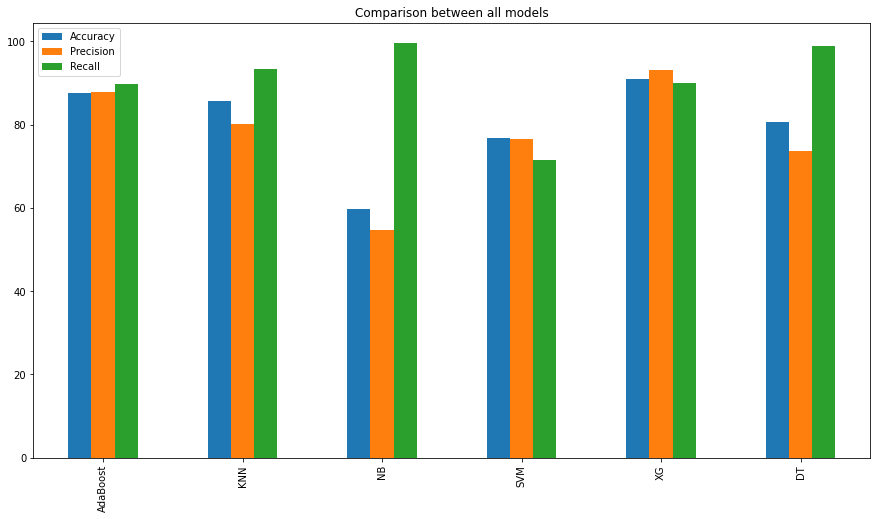

In [ ]:
plotdata = pd.DataFrame({

    "Accuracy":[87.5,85.7,59.6,76.8,91,80.7],

    "Precision":[87.8,80.2,54.6,76.5,93,73.7],

    "Recall":[89.7,93.4,99.5,71.6,89.9,98.8]},

    index=["AdaBoost", "KNN", "NB", "SVM","XG","DT"])

plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("Comparison between all models")


<AxesSubplot:xlabel='Dx:Cancer', ylabel='count'>

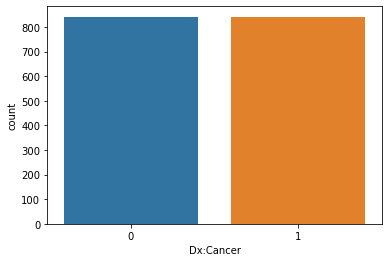

In [ ]:
sns.countplot(x='Dx:Cancer', data=df)

In [ ]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : STDs:pelvic inflammatory disease STDs:AIDS STDs:Hepatitis B STDs: Number of diagnosis total_tests Dx:Cancer
Numerical Features : Age Smokes STDs


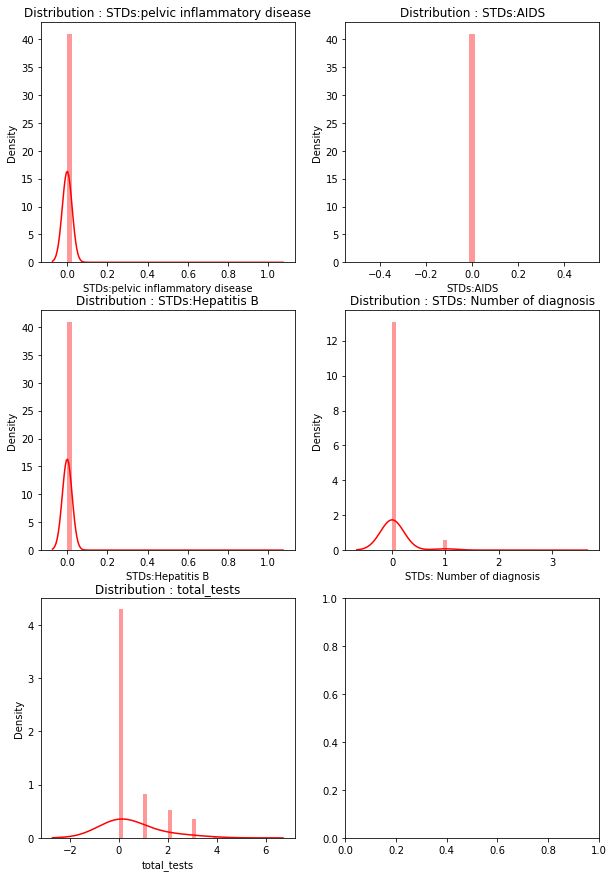

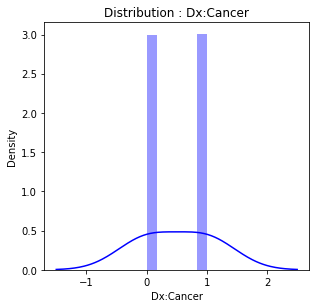

In [ ]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features) - 1):

    plt.subplot(3,2,i+1)
    sns.distplot(df[categorical_features[i]],kde_kws = {'bw' : 1},color = 'red');
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

plt.figure(figsize = (4.75,4.55))
sns.distplot(df[categorical_features[len(categorical_features) - 1]],kde_kws = {'bw' : 1},color = 'blue')
title = 'Distribution : ' + categorical_features[len(categorical_features) - 1]
plt.title(title);

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


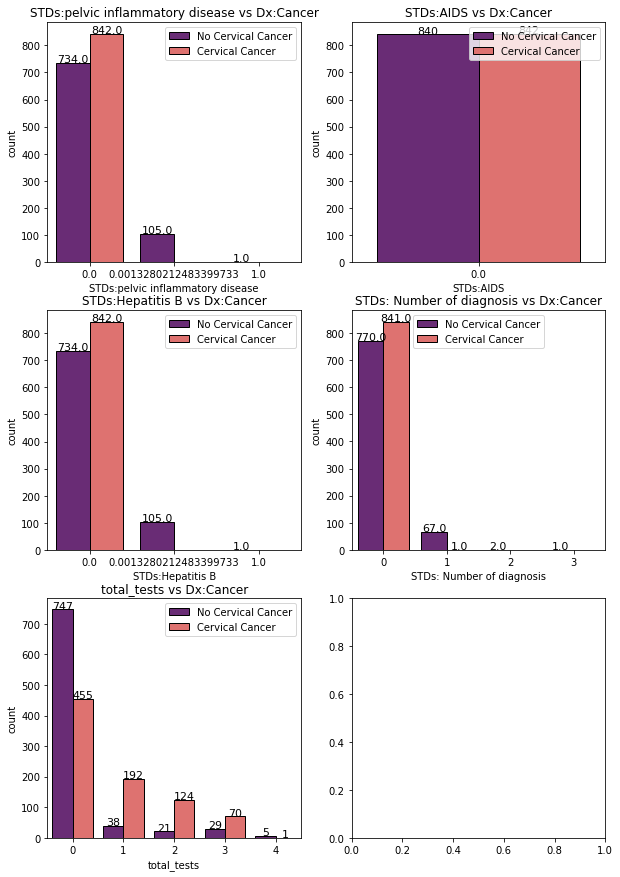

In [ ]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features) - 1):
    plt.subplot(3,2,i+1)
    ax = sns.countplot(categorical_features[i],data = df,hue = "Dx:Cancer",palette = 'magma',edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = categorical_features[i] + ' vs Dx:Cancer'
    plt.legend(['No Cervical Cancer','Cervical Cancer'])
    plt.title(title);